In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
columns = [
    "Sex", "Length", "Diameter", "Height",
    "Whole weight", "Shucked weight", "Viscera weight",
    "Shell weight", "Rings"
]
df = pd.read_csv("abalone.data", header=None, names=columns)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [4]:
df = df.drop(columns=["Sex"])
X = df.drop(columns=["Rings"])
y = df["Rings"]
y = y + 1.5

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rmse_values = []
for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    print(f"K={k}: RMSE = {rmse:.4f}")

K=1: RMSE = 2.8582
K=2: RMSE = 2.4670
K=3: RMSE = 2.3068
K=4: RMSE = 2.2225
K=5: RMSE = 2.2160
K=6: RMSE = 2.1922
K=7: RMSE = 2.1841
K=8: RMSE = 2.1807
K=9: RMSE = 2.1700
K=10: RMSE = 2.1666


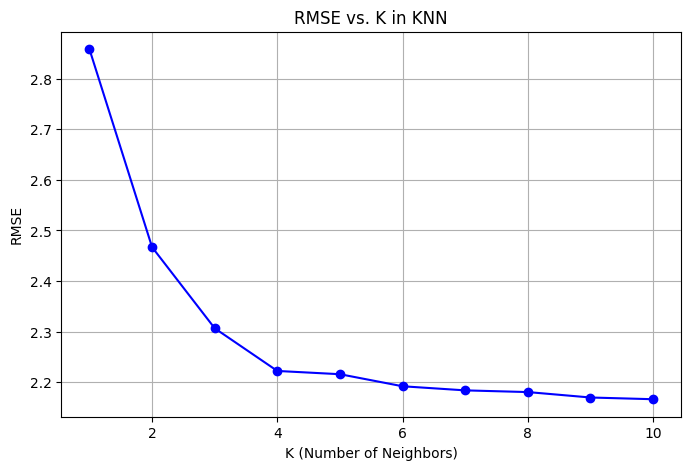

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), rmse_values, marker='o', linestyle='-', color='b')
plt.title("RMSE vs. K in KNN")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

بر اساس مقادیر RMSE به‌دست‌آمده برای مقادیر مختلف k در الگوریتم KNN مشاهده شد که مقدار خطا به‌صورت پیوسته با افزایش k کاهش می‌یابد. کمترین مقدار RMSE مربوط به k=10 با مقدار حدودی 2.1666 است. این نشان می‌دهد که در این داده‌ها افزایش تعداد همسایه‌ها تا عدد 10 باعث بهبود دقت مدل شده است. همچنین مقادیر پایین‌تر k مثل 1 و 2 دقت کمتری داشتند که می‌تواند به دلیل حساسیت زیاد مدل به نویز باشد. بنابراین، در این آزمایش مقدار k=10 بهترین عملکرد را داشته است.